## MNIST

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
type(some_digit)

pandas.core.series.Series

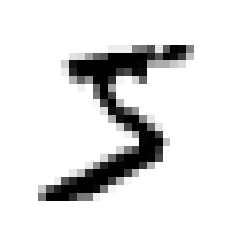

In [48]:
# visualize random digit
from matplotlib import pyplot as plt
import numpy as np

X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
some_digit = mnist['data'].iloc[0]
some_digit_image = some_digit.values.reshape((28, 28))

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [49]:
# train/test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Train SGD

In [50]:
# target: 5
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

/Users/dvorasindmitrij/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Performance measures

### Accuracy with CV

In [58]:
# write my own cross-validation and get accuracy
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfold = StratifiedKFold(n_splits=3)

for train_index, test_index in skfold.split(X_train, y_train_5):
    clf_clone = clone(sgd_clf)
    
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]
    
    clf_clone.fit(X_train_folds, y_train_folds)
    results = clf_clone.predict(X_test_fold)
    
    print(sum(results == y_test_fold)/len(results))

0.95035
0.96035
0.9604


In [65]:
# check accuracy of SGD with cross_val_score
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3)

array([0.95035, 0.96035, 0.9604 ])

In [79]:
# create class of always predicting 0, check its accuracy
from sklearn.base import BaseEstimator

class Never5(BaseEstimator):
    
    def fit(self, X, y=None):
        return self
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype='bool')

In [80]:
never_5 = Never5()
cross_val_score(never_5, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix